# Дивергениция Кульбака-Лейблера, индекс Джини, деревья!

### Снова про энтропию

__Упражнение 1__ 

|X      |1      |2      |      3|
|-------|-------|-------|-------|
|P(X=k)|1/3|1/3|1/3|


$$
H(X) = \mathbb{E}(-\ln P(X=k)) = - \left(\frac{1}{3} \cdot \ln \frac{1}{3} +  \frac{1}{3} \cdot \ln \frac{1}{3} +  \frac{1}{3} \cdot \ln \frac{1}{3} \right) = \ln 3
$$


А что если случайная величина принимает пять значений равновероятно? Какой будет энтропия?


__Упражнение 2__ 

$Y \sim U[0;a]$

$$
p(t) = \begin{cases} \frac{1}{a}, t \in [0;a] \\ 0, t \notin [0;a]  \end{cases}
$$


$$
H(Y) = \mathbb{E}(-\ln p(t)) = - \int_0^a \left(-\ln \frac{1}{a} \right) \cdot \frac{1}{a} dt =  \ln a
$$

--------

$$
\mathbb{E}(X) = \int x \cdot p(x) dx
$$

$$
\mathbb{E}( \varphi(X)) = \int \varphi(x) \cdot p(x) dx
$$

--------


__Упражнение 3__ 



|$X$      |$0$     |$1$|
|-------|-------|-----|
|$P(X=k)$|$1-p$|$p$|

- Найти $H(X)$ 
- Построить график зависимости энтропии от $p$

$$
H(X) = - [ p \cdot \ln p + (1-p) \cdot \ln(1-p)]
$$



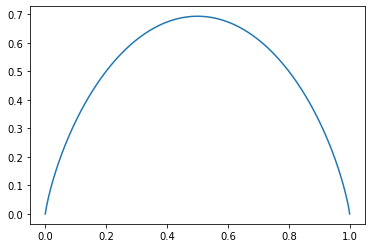

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(1e-10, 1 - 1e-10, 300)
H = -(p * np.log(p) + (1 - p)*np.log(1-p))
plt.plot(p, H);

__Где можно использовать на практике?__

- фрод: приходят люди, заводят себе роботов и пытаются накручивать клики в рекомендательном фиде либо пытаются скликивать рекламу 
- эвристика на основе энтропии: 
     - ip адреса людей, которые кликают 
     - id  рекламных баннеров


__Энтропия в битах и байтах__

- $-\log_2 \frac{1}{2^8} = 8$
- $-\log_c \frac{1}{2^8} = 1 \Rightarrow c = 2^8$

## Кросс-энтропия и дивергенция Кульбака-Лейблера

|$X$| бэтман |  трамп  |  мики маус | Юра | 
|---|--------|---------|------------|-----|
|$p$|$\frac{1}{4}$|$\frac{1}{2}$|$\frac{1}{8}$|$\frac{1}{8}$|
|$q$|$\frac{1}{8}$|$\frac{1}{4}$|$\frac{1}{2}$|$\frac{1}{8}$|

- Распределение $p$ - это настоящий я
- Распределение $q$ - это ваше мнение обо мне

Если мы играем в эту игру, то отгадывающий задаёт вопросы по распределению $q$

__Определение__ Кросс-энтропия $CE(p || q)$ - среднее количество вопросов на угадывание, при использовании $q$, если в реальность загадывание происходит по $p$

$$
CE(p || q) =  - \mathbb{E}_p(\ln q(v)) = - \sum_{v} p(v) \cdot \ln q(v)
$$

In [ ]:
# Кросс-энтропия (когда я отгадываю по своему распределению)
-(1/4 * np.log(1/8) + 1/2 * np.log(1/4) + 1/8 * np.log(1/2) + 1/8 * np.log(1/8))

1.559581156259877

In [ ]:
# Настоящая энтропия (если бы я знал распределение загадывающего)
-(1/4 * np.log(1/4) + 1/2 * np.log(1/2) + 1/8 * np.log(1/8) + 1/8 * np.log(1/8))

1.2130075659799042

$$
CE(p || p) = H(p)
$$

$$
CE(p || q) \ge H(p) 
$$

Попробуйте доказать последнее неравенство на досуге. 


__Определение__ Дивергениция Кульбака Лейблера $KL(p || q)$ - это потери из-за того, что модель не совпадает с реальным миром, то есть это количество лишних вопросов, которые нам пришлось задать в данетке

$$
KL(p || q) = CE(p || q) - H(p) 
$$

Видно, что $KL(p || q) \ge 0$

$$
KL(p || q) = CE(p || q) - H(p) = \mathbb{E}_p(-\ln q(v)) - \mathbb{E}_p(-\ln p(v)) = \sum_v p(v) \cdot \ln \frac{p(v)}{q(v)}
$$

Мы можем заменить сложное распределение на более прсотое! KL-дивенргениця это не метрика. 

__Что такое метрика?__

- $\rho(a, b) \ge 0$
- $\rho(a, b) = \rho(b,a)$
- неравенство треугольника

Для KL-дивергенции $KL(p || q) \ne KL(q || p)$!!!


А почему бы не взять какую-нибудь метрику из матана? 

$$
d(p,q) = \max_t |p(t) - q(t)| 
$$

__Зачем нам вообще нужна $KL$-дивергенция?__

- Если вы подробно поизучаете TSNE, там как раз оптимизируется KL-дивергенция
- С помощью $KL$-дивергенции удобно считать расстояния между распределениями
- Чуть позже мы доберёмся до EM-алгоритма и там окажется что 


$$
\log p(y \mid \theta) = KL(q || p) + ELBO(q, \theta)
$$

$$
\log p(y \mid \theta) \ge ELBO(q, \theta)
$$

Можно расписать сложную функцию правдоподобия через эти два слагаемых (позже докажем) и оптимизация станет на порядок проще!

## Как дивергенция и кросс-энтропия связаны с функциями потерь? 

|$Y$| $0$ | $1$ |
|---|-----|-----|
|настоящее р-е| $1-p$ | $p$|
|модель       | $1-q$ | $q$|

Кросс-энтропия:

$$
CE(p || q) = -\mathbb{E}_p[\ln q(v)] = -[p \cdot \ln q + (1 - p) \cdot \ln(1 - q)]
$$


- $p \sim y \in \{0, 1\}$
- $q \sim p(x) \in [0;1]$

тогда 

$$
CE(p || q) = - [y \cdot \ln p(x) + (1 - y) \cdot \ln (1 - p(x))]
$$

$$
CE(p || q) = KL(p || q) + H(p)
$$

Получается, что если мы решаем задачу оптимизации в ML для классификации, мы либо 

$$
CE(p || q) \to \min_q
$$

либо 

$$
KL(p || q) \to \min_q
$$

# Деревья!

## Индекс Джини!

|$X$|$x_1$|$x_2$|$\ldots$|$x_k$|
|---|-----|-----|------|--------|
|$P(X=x_i)$|$p_1$|$p_2$|$\ldots$|$p_k$|

$$
I_D(X) = \sum_{i=1}^K p_i \cdot (1 - p_i) = \sum_{i=1}^K p_i  - \sum_{i=1}^K p^2_i = 1 - \sum_{i=1}^K p^2_i 
$$

__Упражнение__

|$X$|$0$|$1$|$2$|
|---|---|---|---|
|$P(X=x_i)$|$1/2$|$1/4$|$1/4$|

$$
I_D(X) = 0.5 \cdot (1 - 0.5) + 0.25 \cdot (1 - 0.25) + 0.25 \cdot (1 - 0.25)
$$

ну либо

$$
I_D(X) = 1 - (0.5^2 + 0.25^2 + 0.25^2)
$$


__Упражнение__ 


|$X$      |$0$     |$1$|
|-------|-------|-----|
|$P(X=k)$|$1-p$|$p$|

- Найти $I_D(X)$ 
- Построить график зависимости Джини от $p$

$$
I_D(X) = p \cdot (1 - p) + (1 - p) \cdot p = 2p - 2p^2
$$


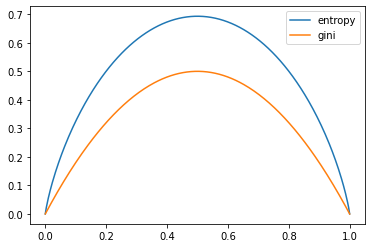

In [ ]:
p = np.linspace(1e-10, 1 - 1e-10, 300)
H = -(p * np.log(p) + (1 - p)*np.log(1-p))
J =  2*p - 2*p**2

plt.plot(p, H, label='entropy');
plt.plot(p, J, label='gini');
plt.legend();

Джини по сравнению с энропией измеряет примерно то же самое, но у кривой чуток другая высота. 